In [1]:
import pandas as pd
import matplotlib as plt
from sklearn.cluster import KMeans
from sklearn.tree import DecisionTreeClassifier # Import Decision Tree Classifier
from sklearn.model_selection import train_test_split # Import train_test_split function
from sklearn import metrics #Import scikit-learn metrics module for accuracy calculation

In [2]:
df = pd.read_csv('./dataset/core_indonesian_movies_after_fill_mising_value.csv')

In [3]:
df

,year,genre,rating,users_rating,votes,languages,runtime
0,1.0,1.0,1.0,6.5,120.0,1.0,100.0
1,1.0,2.0,2.0,6.4,8.0,1.0,80.0
2,1.0,3.0,1.0,5.4,17.0,1.0,92.0
3,1.0,4.0,1.0,9.1,27.0,1.0,129.0
4,1.0,5.0,2.0,7.6,33.0,1.0,109.0
...,...,...,...,...,...,...,...
1267,58.0,5.0,4.0,6.4,30.0,1.0,97.0
1268,59.0,5.0,7.5,6.3,9.0,1.0,116.0
1269,60.0,5.0,7.5,6.6,27.0,1.0,150.0
1270,61.0,4.0,7.5,7.0,8.0,1.0,111.5


In [4]:
df.dtypes

year            float64
genre           float64
rating          float64
users_rating    float64
votes           float64
languages       float64
runtime         float64
dtype: object

In [12]:
df.corr()
df['genre'].unique()

array([ 1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11., 12., 13.,
       14., 15.])

In [6]:
feature_cols = ['year', 'rating', 'users_rating', 'votes', 'runtime']
X = df[feature_cols]
y = df.genre

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1) # 70% training and 30% tes

In [21]:
# Create Decision Tree classifer object
clf = DecisionTreeClassifier(criterion="entropy", max_depth=3)

# Train Decision Tree Classifer
clf = clf.fit(X_train,y_train)

#Predict the response for test dataset
y_pred = clf.predict(X_test)

In [22]:
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.4581151832460733


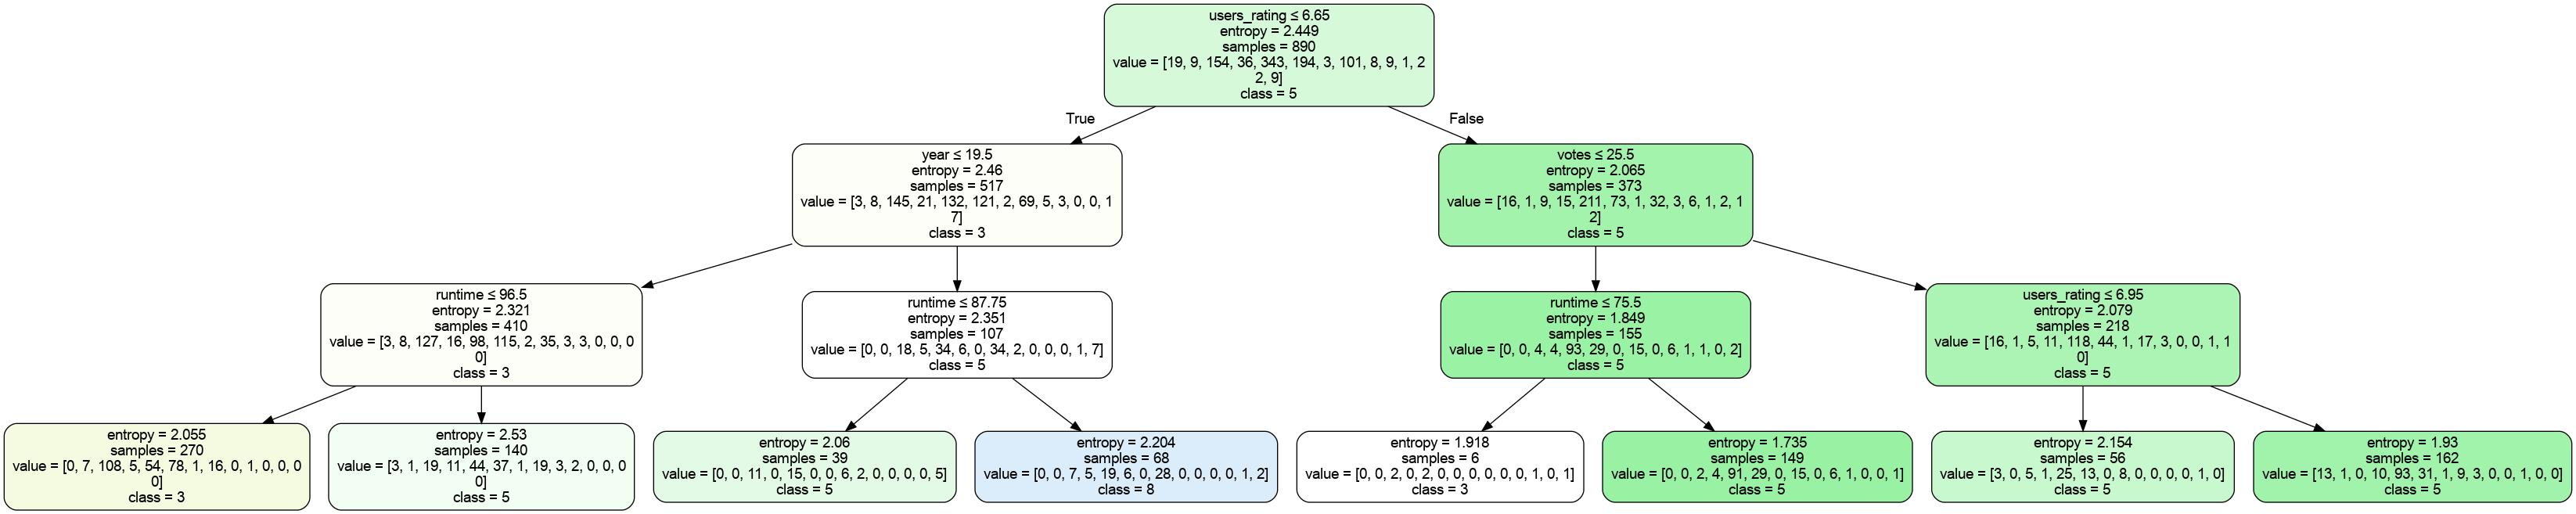

In [25]:
from sklearn.tree import export_graphviz
from six import StringIO  
from IPython.display import Image  
import pydotplus

dot_data = StringIO()
export_graphviz(clf, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True,feature_names = feature_cols,class_names=['1','2', '3', '4', '5', '6', 
                                                                                  '7', '8', '9', '10', '11', '12', '13', '14', '15'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png('genre.png')
Image(graph.create_png())